In [1]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [23]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [49]:
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)

Filtering 'bundestag' corpus : 100%|███████████████████████████████████████████████████| 877973/877973 [00:27<00:00, 32494.36it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|████████████████████████████████████████████████████| 407961/407961 [00:10<00:00, 40699.95it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|██████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37210.42it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


In [11]:
# extract keywords from documents in corpus and assign keywords to documents
keywords = KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 3365.46it/s]


In [34]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

def simple_bar_histogram(bin_data: List[Union[int, str]], count_data: List[int]):
    plt.bar(x=bin_data, height=count_data, color='lawngreen', align='center', alpha=0.5)
    plt.show()
    
def multi_bar_histogram(multiple_bin_data: List[List[Union[int, str]]],
                        multiple_count_data: List[List[int]],
                        labels: List[str],
                        normalize: bool = True,
                        corpus_lengths: List[int] = None):
    c = []
    if normalize:
        for i, count_data in enumerate(multiple_count_data):
            if corpus_lengths:
                sum_counts = corpus_lengths[i]
            else:
                sum_counts = sum(count_data)
            c.append([count/sum_counts for count in count_data])
    else:
        c = multiple_count_data
    for bin_data, count_data, label in zip(multiple_bin_data, c, labels):
        plt.bar(x=bin_data, height=count_data, align='center', alpha=0.5, label=label)
    plt.legend(loc='best')
    plt.show()

In [35]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []

for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    years, counts = yearwise_documents(corpus)
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 33206.56it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████| 407961/407961 [00:09<00:00, 41091.79it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37555.28it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


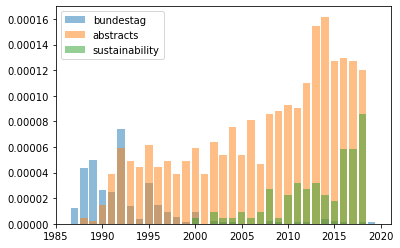

In [38]:
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=True, corpus_lengths=[877973, 407961, 221034])

In [ ]:
kwt = KeywordTranslator()

for d in corpus.get_documents():
    print(d.text[:100], '...\n  keywords:')
    for kw in d.keywords:
        print('    - \"'+str(kw)+'\"')
    print('\n')

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))